In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Lagrange polynomial
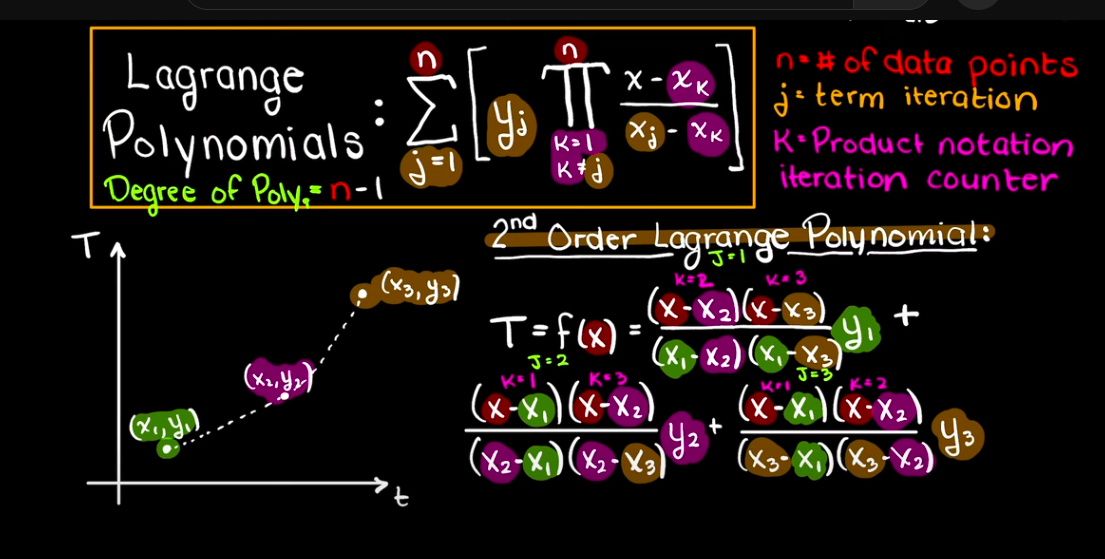

# Exercise 7.1
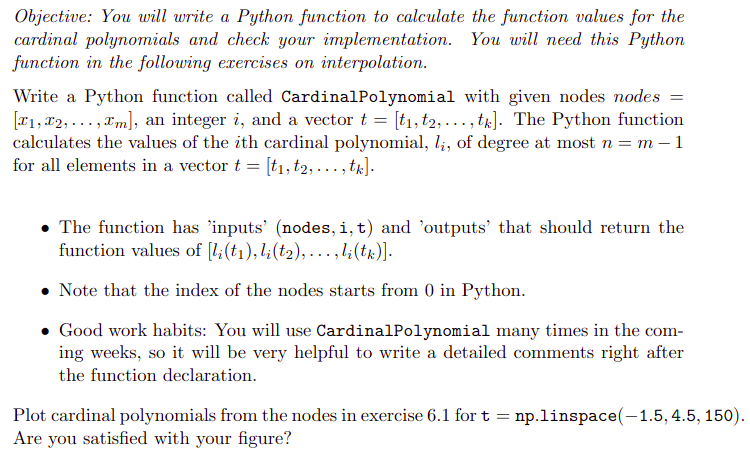

In [2]:
def CardinalPolynomial(nodes, i, t):
    cardinals = []
    #loop that calculates ith polynomial
    for arg in t: 
        l = 1
        for index in range(len(nodes)):
            if index == i: 
                continue
            else:
                l*=(arg-nodes[index])/(nodes[i]-nodes[index])
        cardinals.append(l)
    return cardinals

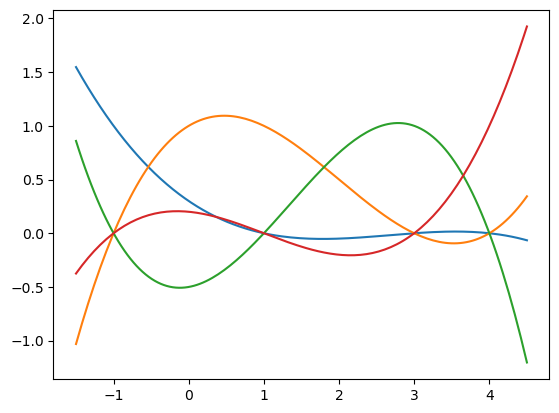

In [16]:
t=np.linspace(-1.5,4.5,150)
nodes = [-1, 1, 3, 4]
for i in range(4):
    cardinals = CardinalPolynomial(nodes, i, t)
    plt.plot(t, cardinals)

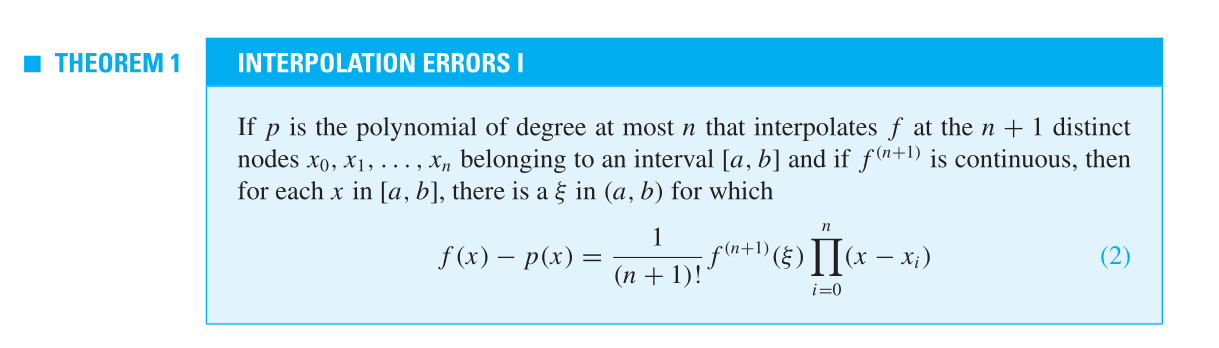
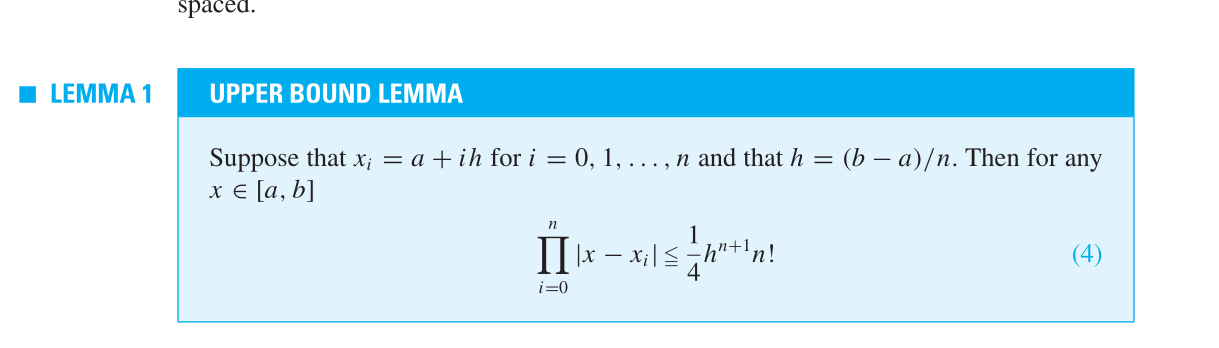
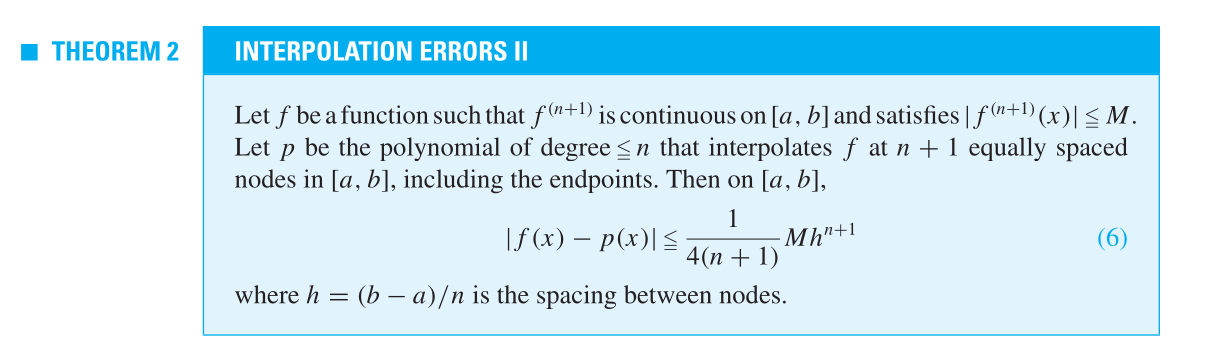

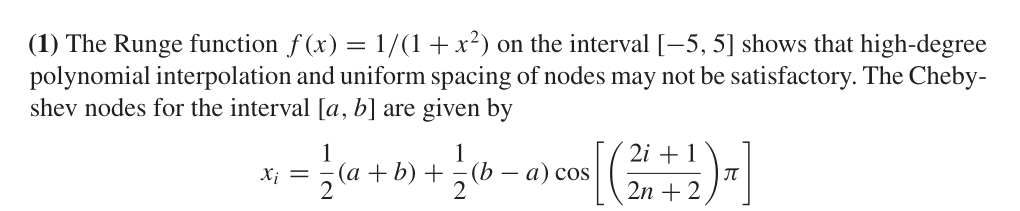

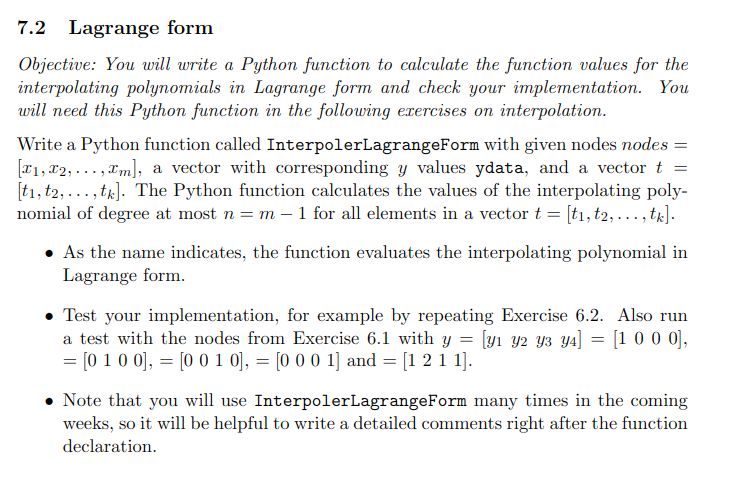

In [22]:
def InterpolerLangrangeForm(nodes, ydata, t):
    ydata = np.r_[*ydata].reshape(-1, 1)
    nodes = np.r_[*nodes]
    cardinals_matrix = []

    for i in range(len(nodes)):
        cardinals = np.array(CardinalPolynomial(nodes, i, t)).T
        cardinals_matrix.append(cardinals)

    cardinals_matrix = np.column_stack(cardinals_matrix)
    langrange = cardinals_matrix @ ydata

    return langrange

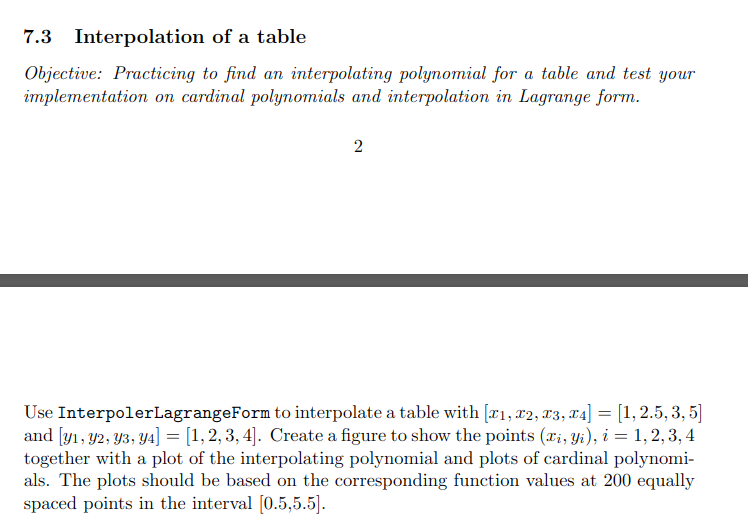

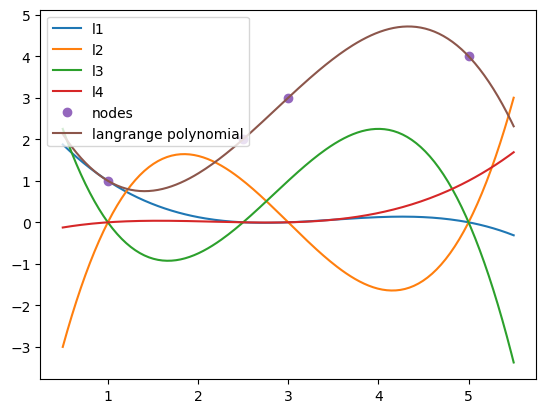

In [23]:
x = [1,2.5,3,5]
y = [1,2,3,4]
t = np.linspace(0.5,5.5,200)

for i in range(4):
    cardinals = CardinalPolynomial(x, i, t)
    plt.plot(t, cardinals)


plt.plot(x,y,'o')
langrange = InterpolerLangrangeForm(x,y,t)
plt.plot(t,langrange)
plt.legend(['l1','l2','l3','l4','nodes','langrange polynomial'])
plt.show()

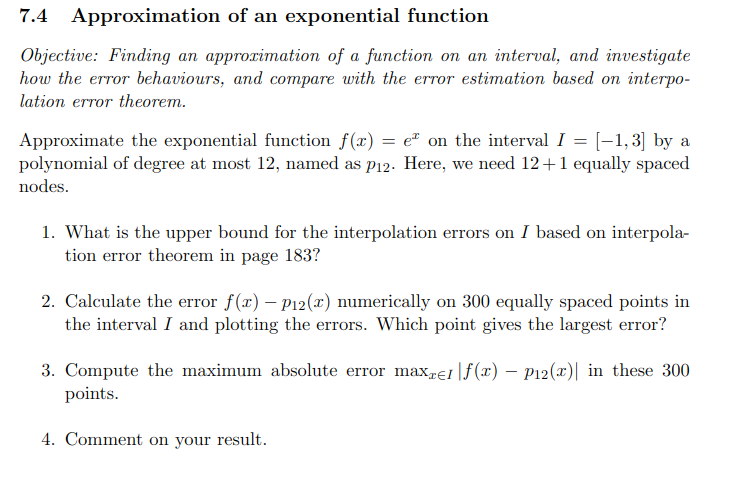

$\frac{1}{4(n+1)}Mh^{n+1} = \frac{1}{2\cdot13}e^3(\frac{4}{12})^{13}$

In [24]:
1/(4*13)*np.exp(3)*(4/12)**13

2.422723158644242e-07

Max error = 1.7359965909236053e-08


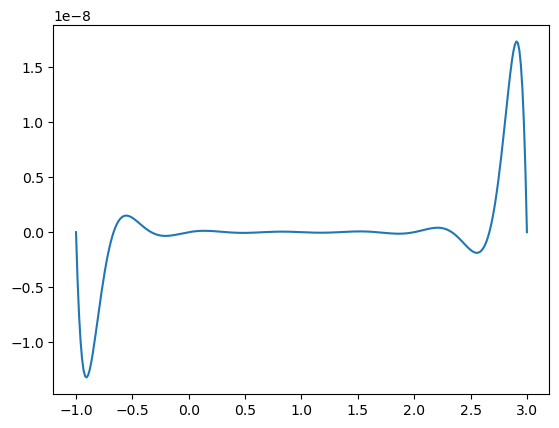

In [35]:
f = lambda x: np.exp(x)
t = np.linspace(-1,3,300)
x=np.linspace(-1,3,13)
ydata=f(x)
plt.plot(t, InterpolerLangrangeForm(x,ydata,t) - f(t).reshape(-1,1))
print("Max error =", max(abs(InterpolerLangrangeForm(x,ydata,t) - f(t).reshape(-1,1)))[0])

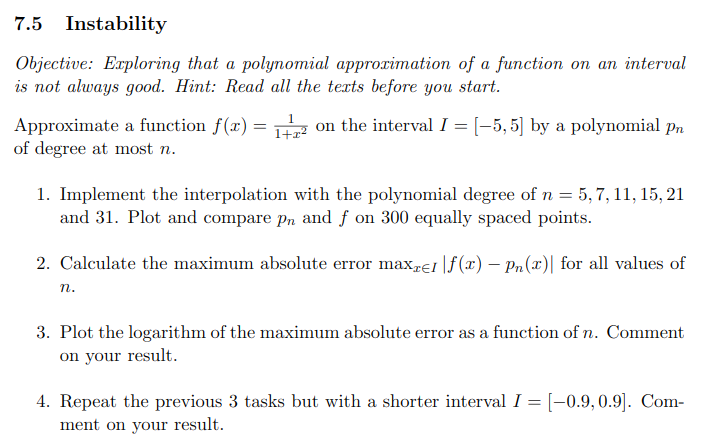

Max. absolute error for n = 5 is: 4.8828125


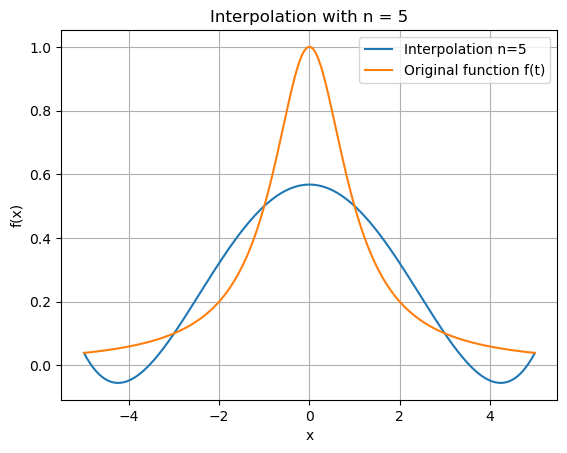

Max. absolute error for n = 7 is: 1.2758018159252729


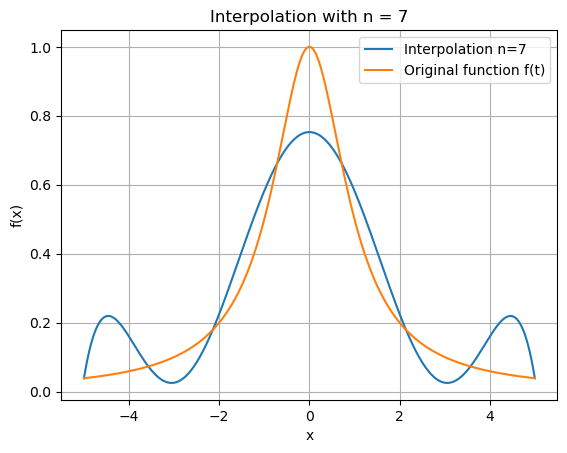

Max. absolute error for n = 11 is: 0.022727272727272728


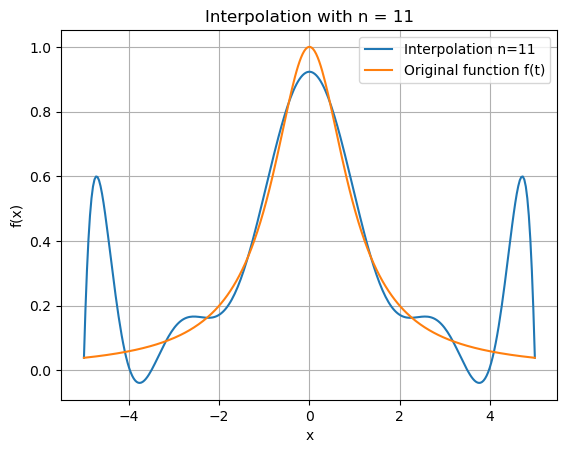

Max. absolute error for n = 15 is: 0.00010713422059263434


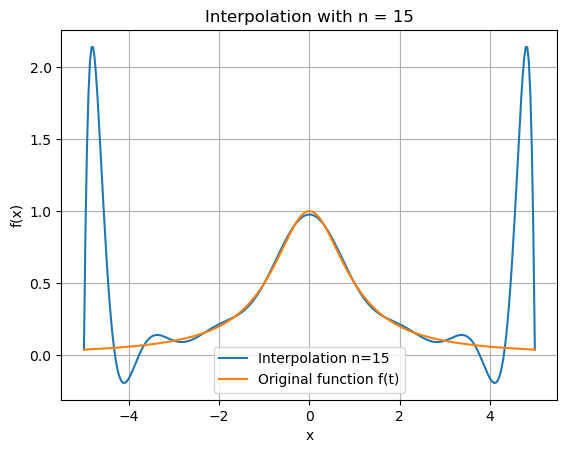

Max. absolute error for n = 21 is: 5.676632835751488e-09


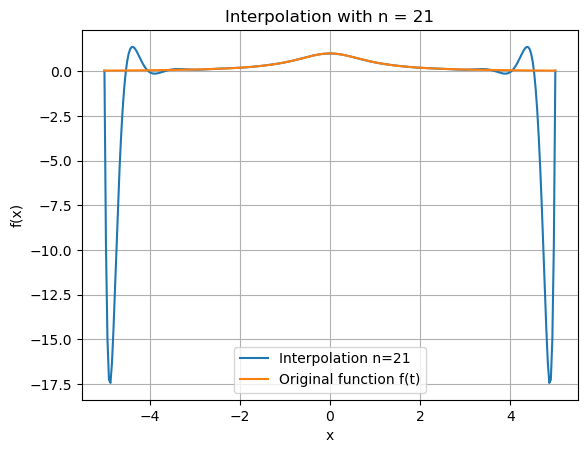

Max. absolute error for n = 31 is: 1.3056278896824873e-17


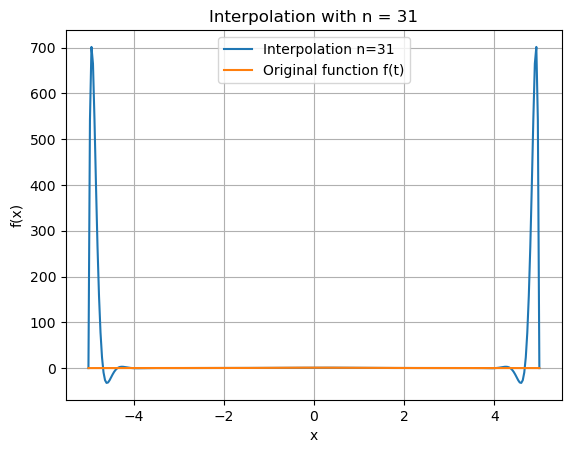

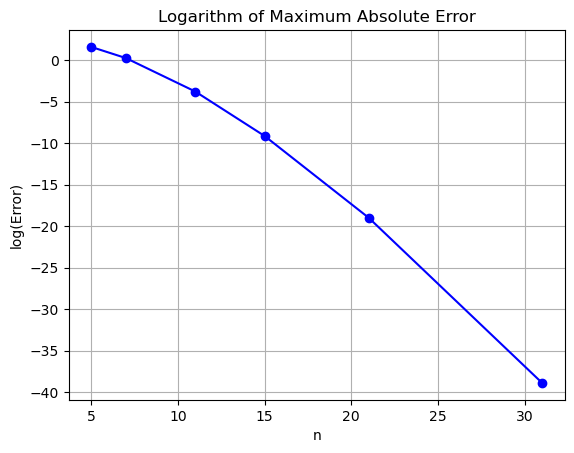

In [47]:
f = lambda x: 1/(1+x**2)
t = np.linspace(-5,5,300)
N = [5,7,11, 15,21,31]
err = []
for n in N:
    error = 1/(4*n)*(10/(n-1))**n
    err.append(error)
    print("Max. absolute error for n =", n, "is:", error)
    x = np.linspace(-5,5,n+1)
    # Create a new figure for each interpolation plot
    plt.figure()
    plt.plot(t, InterpolerLangrangeForm(x, f(x), t), label=f'Interpolation n={n}')
    plt.plot(t, f(t), label='Original function f(t)')
    plt.legend()
    plt.title(f'Interpolation with n = {n}')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    plt.show()

# Plot the logarithm of the error separately
plt.figure()
plt.plot(N, np.log(err), marker='o', linestyle='-', color='b')
plt.title('Logarithm of Maximum Absolute Error')
plt.xlabel('n')
plt.ylabel('log(Error)')
plt.grid(True)
plt.show()

Max. absolute error for n = 5 is: 4.8828125


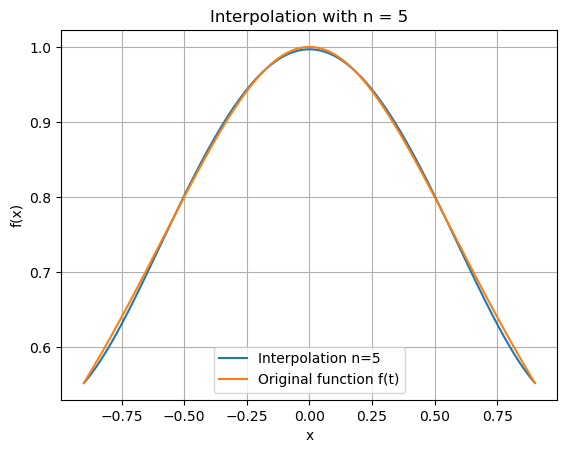

Max. absolute error for n = 7 is: 1.2758018159252729


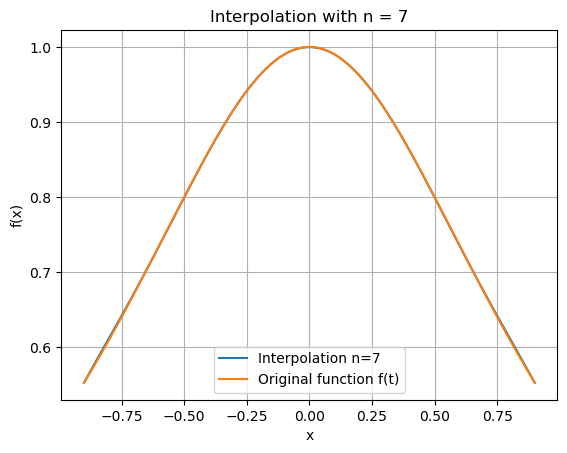

Max. absolute error for n = 11 is: 0.022727272727272728


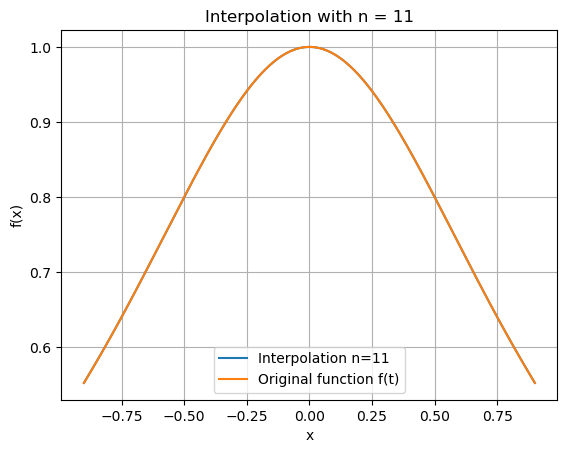

Max. absolute error for n = 15 is: 0.00010713422059263434


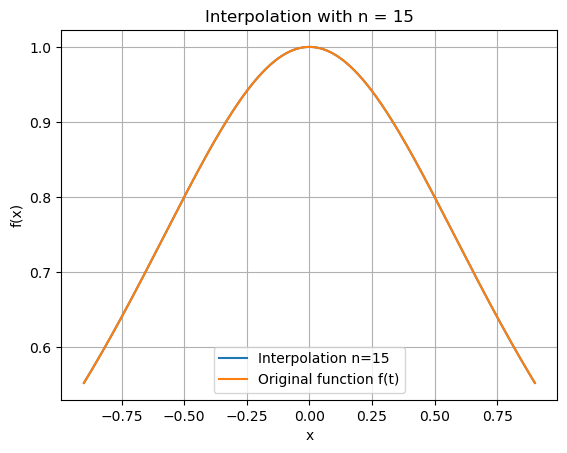

Max. absolute error for n = 21 is: 5.676632835751488e-09


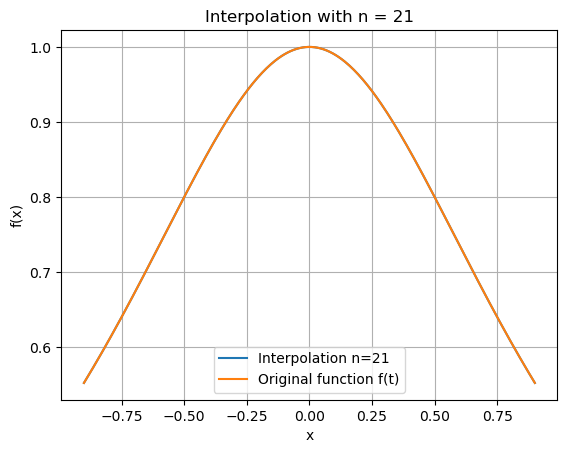

Max. absolute error for n = 31 is: 1.3056278896824873e-17


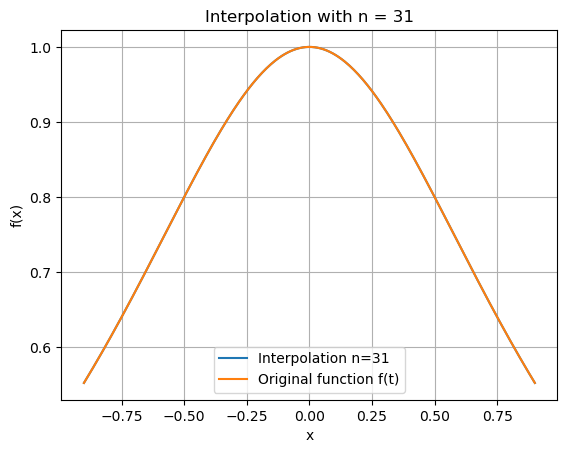

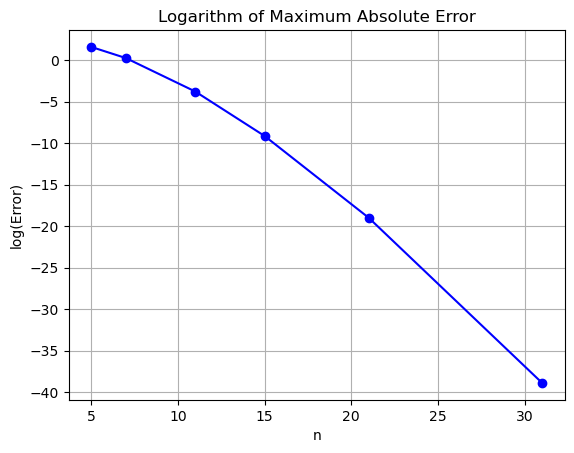

In [48]:
f = lambda x: 1/(1+x**2)
t = np.linspace(-0.9,0.9,300)
N = [5,7,11, 15,21,31]
err = []
for n in N:
    error = 1/(4*n)*(10/(n-1))**n
    err.append(error)
    print("Max. absolute error for n =", n, "is:", error)
    x = np.linspace(-0.9,0.9,n+1)
    # Create a new figure for each interpolation plot
    plt.figure()
    plt.plot(t, InterpolerLangrangeForm(x, f(x), t), label=f'Interpolation n={n}')
    plt.plot(t, f(t), label='Original function f(t)')
    plt.legend()
    plt.title(f'Interpolation with n = {n}')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    plt.show()

# Plot the logarithm of the error separately
plt.figure()
plt.plot(N, np.log(err), marker='o', linestyle='-', color='b')
plt.title('Logarithm of Maximum Absolute Error')
plt.xlabel('n')
plt.ylabel('log(Error)')
plt.grid(True)
plt.show()

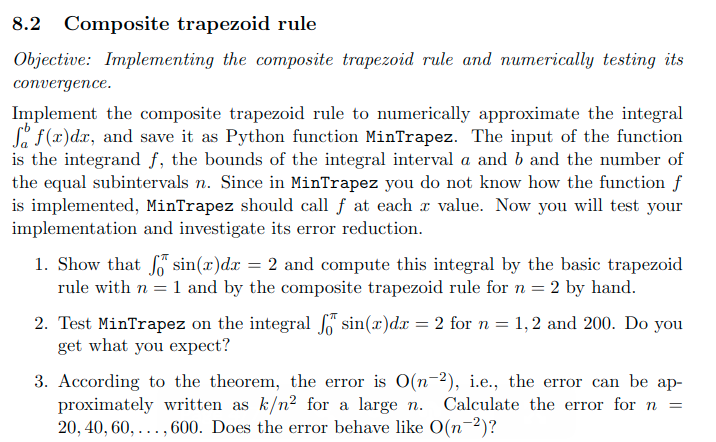
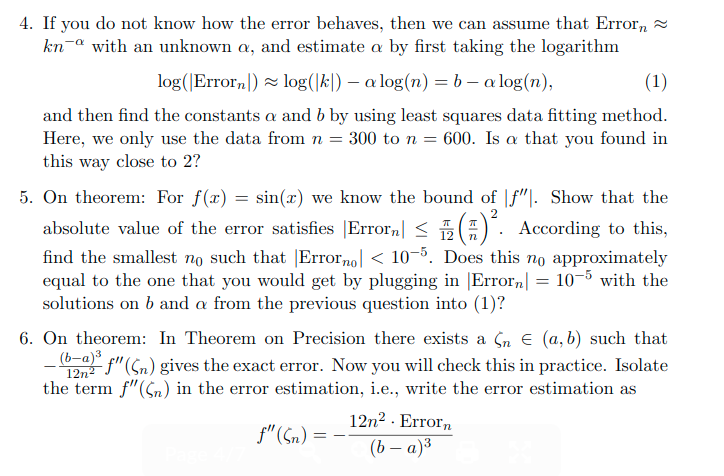
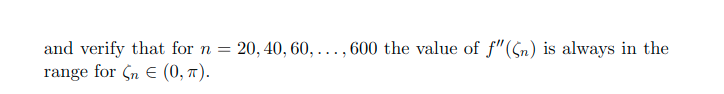

In [8]:
def MinTrapez(f, a, b, n):
    if b > a:
        h = (b-a)/n
    else:
        h = (a-b)/n
    boundry_sum = f(a) + f(b)
    mid_sum = 0
    for i in range(1,n, 1):
        mid_sum += 2*f(a+h*i)
    integral = h/2 * (mid_sum + boundry_sum)
    return integral


In [9]:
f = lambda x: np.sin(x)
MinTrapez(f, 0, np.pi, 200)

1.9999588764792162

In [10]:
err = []
err_theor = []
for n in range(20, 600, 20):
    err.append(2 - MinTrapez(f, 0, np.pi, n))
    err_theor.append(1.6449/n**2)
display(err, err_theor)

[0.004114027291284961,
 0.0010281895029344845,
 0.00045694700919240994,
 0.00025702755416445733,
 0.0001644961125564226,
 0.0001142328373253676,
 8.392591184547271e-05,
 6.425564986356491e-05,
 5.0769827721230953e-05,
 4.112352078378123e-05,
 3.398635655815774e-05,
 2.855796465839333e-05,
 2.433340339469403e-05,
 2.098134589223477e-05,
 1.827707859169969e-05,
 1.6063835050816877e-05,
 1.4229553696898378e-05,
 1.2692408599912497e-05,
 1.1391523134118842e-05,
 1.028084848675448e-05,
 9.32503175077315e-06,
 8.49656748180827e-06,
 7.773796528498522e-06,
 7.139475875161949e-06,
 6.5797405970347e-06,
 6.0833397468318395e-06,
 5.641066511019588e-06,
 5.2453282211040175e-06,
 4.889818287390213e-06]

[0.0041122500000000005,
 0.0010280625000000001,
 0.00045691666666666667,
 0.00025701562500000003,
 0.00016449,
 0.00011422916666666667,
 8.392346938775511e-05,
 6.425390625000001e-05,
 5.076851851851852e-05,
 4.11225e-05,
 3.3985537190082646e-05,
 2.8557291666666667e-05,
 2.433284023668639e-05,
 2.0980867346938777e-05,
 1.8276666666666667e-05,
 1.6063476562500002e-05,
 1.422923875432526e-05,
 1.269212962962963e-05,
 1.1391274238227147e-05,
 1.0280625e-05,
 9.32482993197279e-06,
 8.496384297520662e-06,
 7.773629489603025e-06,
 7.139322916666667e-06,
 6.5796000000000005e-06,
 6.083210059171598e-06,
 5.6409465020576135e-06,
 5.245216836734694e-06,
 4.889714625445898e-06]

In [11]:
err[10]/err_theor[10]

1.0000241093165751

In [12]:
def lin_regression(x,y):
    y = np.array(y)
    x = np.array(x)
    return np.linalg.inv(x.T@x)@x.T@y

In [13]:
y = []
x = []
for n in range(300, 600, 20):
    y.append(np.log(2 - MinTrapez(f, 0, np.pi, n)))
    x.append([1,np.log(n)])

In [14]:
bet = lin_regression(x,y)
bet

array([ 0.4977131 , -2.00000195])

In [15]:
np.exp(0.4977131)

1.6449551180747706

Error:

$|Error_n| \leq \frac{\pi}{12}(\frac{\pi}{n})^2$

$|Error_n| \leq 10^{-5} \Rightarrow 10^{-5} = \frac{\pi}{12}(\frac{\pi}{n})^2 \Rightarrow n = \sqrt{\frac{\pi^3}{12\cdot10^{-5}}}$

In [16]:
n_theor = np.sqrt(np.pi**3/(12*10**(-5)))
n_theor

508.31647524204686

In [17]:
n_calc = np.exp((np.log(10**(-5)) - bet[0])/bet[1])
n_calc

405.5780867518543

In [18]:
from sympy import*
chi = symbols("chi")

In [22]:
sol = []
for n in range(20, 600, 20):
    sol.append(solve(12*n**2*(2 - MinTrapez(f, 0, np.pi, n))/np.pi**3 - sin(chi),chi))

In [23]:
sol

[[0.690446818492788, 2.45114583509701],
 [0.690191976794173, 2.45140067679562],
 [0.690144814415846, 2.45144783917395],
 [0.690128309834370, 2.45146434375542],
 [0.690120670965971, 2.45147198262382],
 [0.690116521560993, 2.45147613202880],
 [0.690114019646073, 2.45147863394372],
 [0.690112395808091, 2.45148025778170],
 [0.690111282522020, 2.45148137106777],
 [0.690110486169811, 2.45148216741998],
 [0.690109897024032, 2.45148275656576],
 [0.690109448821911, 2.45148320476788],
 [0.690109100112221, 2.45148355347757],
 [0.690108823324395, 2.45148383026540],
 [0.690108600150667, 2.45148405343913],
 [0.690108417450972, 2.45148423613882],
 [0.690108265970208, 2.45148438761959],
 [0.690108139095070, 2.45148451449472],
 [0.690108031707385, 2.45148462188241],
 [0.690107940025660, 2.45148471356413],
 [0.690107861212336, 2.45148479237746],
 [0.690107792780383, 2.45148486080941],
 [0.690107733035781, 2.45148492055401],
 [0.690107680946872, 2.45148497264292],
 [0.690107634586294, 2.45148501900350],


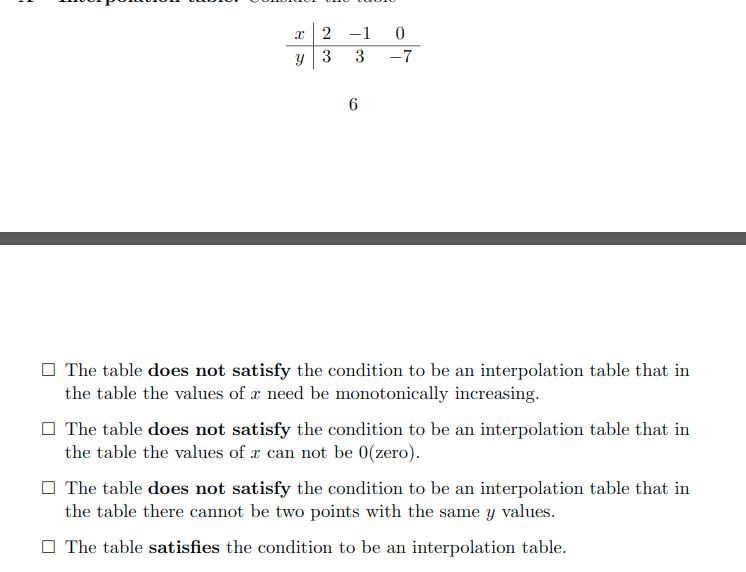
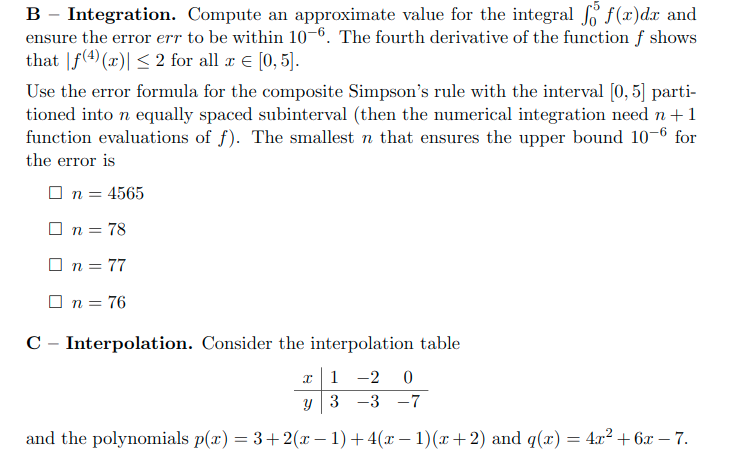
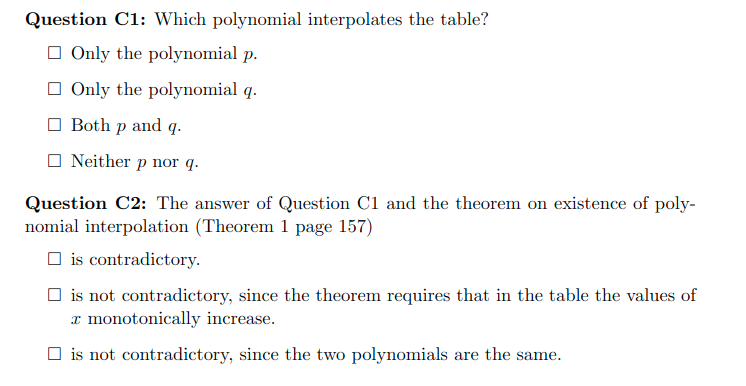

A: last one

B: answer 78. $Err = \frac{(b-a)^5}{180n^4} \cdot f^{(4)}(\xi)$

C1: both p and 1

C2: last one


In [24]:
(np.pi/6)**4

0.07516133567438456

In [25]:
(4**5*8*np.exp(4)/(180*10**(-4)))**(1/4)

70.60311159357109